<a href="https://colab.research.google.com/github/felipeProgrammingDesign/ApplicationBES/blob/master/ADAM_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/andrewyzy/pnfiles/raw/master/dataset.tar.gz

!tar -zxvf dataset.tar.gz

Aqui vamos colocar nossas funções de data augmentation. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    (height, width) = mat.shape[:2]  # image shape has 3 dimensions
    image_center = (width / 2, height / 2)  # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.

    abs_cos = abs(rotation_mat[0, 0])
    abs_sin = abs(rotation_mat[0, 1])

    # find the new width and height bounds

    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates

    rotation_mat[0, 2] += bound_w / 2 - image_center[0]
    rotation_mat[1, 2] += bound_h / 2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix

    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat


def load_and_rotate(
    path,
    height=224,
    width=224,
    num_channels=1,
    angle=0,
    ):
    classes = sorted(os.listdir(path))
    images = [sorted(os.listdir(path + '/' + id)) for id in classes]
    num_images = np.sum([len(l) for l in images])

    X = np.empty([num_images, height, width, num_channels],
                 dtype=np.uint8)
    y = np.empty([num_images], dtype=np.int64)

    k = 0
    for i in range(len(classes)):
        for j in range(len(images[i])):
            img_n = cv2.imread(path + '/' + classes[i] + '/'
                             + images[i][j],
                             cv2.IMREAD_GRAYSCALE)
            img = rotate_image(img_n, angle)
            width = 77
            height = 71
            dim = (width, height)
 
            img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  

            if((i == 0) and (j == 0)):
              print("ANTES:")
              plt.imshow(img_n, cmap=plt.cm.gray)
              plt.show()

              print("DEPOIS:")
              plt.imshow(img, cmap=plt.cm.gray)
              plt.show()
            
            img = img.reshape(height,
                    width, num_channels)

            X[k] = img
            y[k] = i
            k += 1

    return (X, y, classes)

Aqui nós vamos carregar as imagens, labels, separar os dados e fazer o sorteio.

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import cv2
import os


def load_multiclass_dataset(
    path,
    height=224,
    width=224,
    num_channels=1,
    ):
    classes = sorted(os.listdir(path))
    images = [sorted(os.listdir(path + '/' + id)) for id in classes]
    num_images = np.sum([len(l) for l in images])

    X = np.empty([num_images, height, width, num_channels],
                 dtype=np.uint8)
    y = np.empty([num_images], dtype=np.int64)

    k = 0
    for i in range(len(classes)):
        for j in range(len(images[i])):
            img = cv2.imread(path + '/' + classes[i] + '/'
                             + images[i][j],
                             cv2.IMREAD_GRAYSCALE).reshape(height,
                    width, num_channels)
            assert img.shape == (height, width, num_channels), \
                '%r has an invalid image size!' % images[i][j]
            assert img.dtype == np.uint8, \
                '%r has an invalid pixel format!' % images[i][j]
            X[k] = img
            y[k] = i
            k += 1

    return (X, y, classes)


def shuffle(X, y, seed=None):
    assert len(X) == len(y), \
        'The 1st dimension size must be the same for both arrays!'
    if seed is not None:
        np.random.seed(seed)
    p = np.random.permutation(len(X))
    return (X[p], y[p])


def split(X, y, rate):
    assert len(X) == len(y), \
        'The 1st dimension size must be the same for both arrays!'
    idx = int(len(X) * float(rate))
    return (X[:idx], y[:idx], X[idx:], y[idx:])


def randomize(a, b):
    permutation = np.random.permutation(a.shape[0])
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    return (shuffled_a, shuffled_b)


def shuffle_split_data(X, y, proporcao):
    np.random.seed(50)
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, proporcao)
    X_train = X[split]
    y_train = y[split]
    X_test = X[~split]
    y_test = y[~split]
    return (X_train, y_train, X_test, y_test)


Instructions for updating:
non-resource variables are not supported in the long term
(5490, 5467)
ANTES:


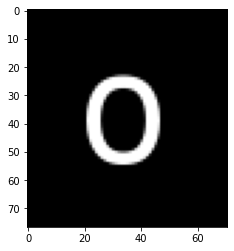

DEPOIS:


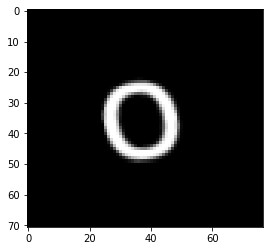

(8000, 5467) (8000,) (2000, 5467) (2000,)
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Training Epoch:0 LR:0.001 Time:12.184975624084473 ACC:0.6925 Loss:0.42809778190537834
Validation Epoch:0 Time:1.8005473613739014 ACC:0.7705 Loss:0.3299069237273711
Training Epoch:1 LR:0.001 Time:10.614903926849365 ACC:0.805375 Loss:0.289368293520298
Validation Epoch:1 Time:1.7938530445098877 ACC:0.813 Loss:0.26752429152286866
Training Epoch:2 LR:0.001 Time:10.56752324104309 ACC:0.834375 Loss:0.25146713774007334
Validation Epoch:2 Time:1.761606216430664 ACC:0.845 Loss:0.23172808869405262
Training Epoch:3 LR:0.001 Time:10.531045913696289 ACC:0.85325 Loss:0.22112826756639442
Validation Epoch:3 Time:1.7818398475646973 ACC:0.8385 Loss:0.24214104783631385
Training Epoch:4 LR:0.001 Time:10.557027101516724 ACC:0.863875 Loss:0.206848520931563
Validation Epoch:4 Time:1.7957043647766113 ACC:0.862 Loss:0.20842416892340598
Traini

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import random
import time
import cv2
import os
import glob
import sys
import os
from os import listdir
import re

TRAIN_FOLDER = './dataset/train'
TEST_FOLDER = './dataset/test'
SPLIT_RATE = 0.8

IMAGE_HEIGHT = 71
IMAGE_WIDTH = 77
NUM_CHANNELS = 1


def read_images_test(dataset_path):
    (imagepaths, labels) = (list(), list())
    images_list = []
    for i in range(1, 5491):
        labels.append(str(i) + '.png')
        img = cv2.imread('./dataset/test/' + str(i) + '.png',
                         cv2.COLOR_BGR2GRAY)

        reshaped = np.reshape(img, (img.shape[0], -1))

        reshaped = reshaped.flatten()
        images_list.append(reshaped)

    images_tensor = np.array(images_list, dtype=np.uint8)
    print(images_tensor.shape)
    return (images_tensor, labels)


(test, labels_test) = read_images_test(TEST_FOLDER)

test = test / 255.
X_test = test

(X_train, y_train, classes_train) = \
    load_multiclass_dataset(TRAIN_FOLDER, IMAGE_HEIGHT, IMAGE_WIDTH,
                            NUM_CHANNELS)
X_train = X_train.reshape(-1, IMAGE_HEIGHT * IMAGE_WIDTH
                          * NUM_CHANNELS) / 255.


#ABRINDO NOVAMENTE AS IMAGENS E ROTACIONANDO ELAS.
(X_train_aug, y_train_aug, classes_train_aug) = \
    load_and_rotate(TRAIN_FOLDER, IMAGE_HEIGHT, IMAGE_WIDTH,
                            NUM_CHANNELS, 10)
X_train_aug = X_train_aug.reshape(-1, IMAGE_HEIGHT * IMAGE_WIDTH
                          * NUM_CHANNELS) / 255.

#JUNTANDO AS IMAGENS ORIGINAIS COM AS ROTACIONADAS
X_train = np.concatenate((X_train, X_train_aug))
y_train = np.concatenate((y_train, y_train_aug))

(X_train, y_train) = shuffle(X_train, y_train, seed=42)
(X_train, y_train, X_val, y_val) = split(X_train, y_train, SPLIT_RATE)

print (X_train.shape, y_train.shape, X_val.shape, y_val.shape)

graph = tf.Graph()

with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None, IMAGE_HEIGHT
                       * IMAGE_WIDTH * NUM_CHANNELS))
    y = tf.placeholder(tf.int64, shape=(None, ))
    y_one_hot = tf.one_hot(y, len(classes_train))
    learning_rate = tf.placeholder(tf.float32)

    camada_1 = tf.layers.dense(X, 10, activation=tf.nn.relu)  # numero de classes = 10 (10 numeros)
    camada_2 = tf.layers.dense(camada_1, 12, activation=tf.nn.relu)  # Camada intermediaria
    out = tf.layers.dense(camada_2, len(classes_train),
                          activation=tf.nn.softmax)  # Camada de saida

    loss = tf.reduce_mean(tf.reduce_sum((y_one_hot-out)**2))

    train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    result = tf.argmax(out, 1)
    correct = tf.reduce_sum(tf.cast(tf.equal(result, y), tf.float32))


def training_epoch(session, op, lr):
    batch_list = np.random.permutation(len(X_train))

    start = time.time()
    train_loss = 0
    train_acc = 0
    for j in range(0, len(X_train), BATCH_SIZE):
        if j + BATCH_SIZE > len(X_train):
            break
        X_batch = X_train.take(batch_list[j:j + BATCH_SIZE], axis=0)
        y_batch = y_train.take(batch_list[j:j + BATCH_SIZE], axis=0)

        ret = session.run([op, loss, correct], feed_dict={X: X_batch,
                          y: y_batch, learning_rate: lr})
        train_loss += ret[1] * BATCH_SIZE
        train_acc += ret[2]

    pass_size = len(X_train) - len(X_train) % BATCH_SIZE
    print ('Training Epoch:' + str(epoch) + ' LR:' + str(lr) + ' Time:' \
        + str(time.time() - start) + ' ACC:' + str(train_acc
            / pass_size) + ' Loss:' + str(train_loss / pass_size))
    return train_loss / pass_size


def evaluation(
    session,
    Xv,
    yv,
    name='Evaluation',
    ):
    start = time.time()
    eval_loss = 0
    eval_acc = 0
    for j in range(0, len(Xv), BATCH_SIZE):
        ret = session.run([loss, correct], feed_dict={X: Xv[j:j
                          + BATCH_SIZE], y: yv[j:j + BATCH_SIZE]})
        eval_loss += ret[0] * min(BATCH_SIZE, len(Xv) - j)
        eval_acc += ret[1]

    tf.summary.histogram('Loss', eval_loss / len(Xv))
    print (name + ' Epoch:' + str(epoch) + ' Time:' + str(time.time()
            - start) + ' ACC:' + str(eval_acc / len(Xv)) + ' Loss:' \
        + str(eval_loss / len(Xv)))

    return (eval_acc / len(Xv), eval_loss / len(Xv))


NUM_EPOCHS_FULL = 6
S_LEARNING_RATE_FULL = 0.001
F_LEARNING_RATE_FULL = 0.001
BATCH_SIZE = 1

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())

    loss_training = []
    loss_validation = []

    for epoch in range(NUM_EPOCHS_FULL):
      lr = (S_LEARNING_RATE_FULL*(NUM_EPOCHS_FULL-epoch-1)+F_LEARNING_RATE_FULL*epoch)/(NUM_EPOCHS_FULL-1)
      loss_return = training_epoch(session, train_op, lr)
      loss_training.append(loss_return)

      val_acc, val_loss = evaluation(session, X_val, y_val, name='Validation')
      loss_validation.append(val_loss)




    file = open('NOME_SOBRENOME.txt', 'w')
    string = ''
    result = tf.argmax(out, 1)
    for i in range(len(X_test)):
        saida = result.eval(feed_dict={X: [X_test[i]]}, session=session)

        a = str(labels_test[i]) + ' ' + str(saida) + '\n'
        a = a.replace('[', '')
        a = a.replace(']', '')

        string = string + a

    file.write(string)
    file.close()
